# Сборный проект - 1

## Открытие проекта и изучение общей информации

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо будет выполнить преобразование следующих типов:

- User_Scrore поменять тип на float64

In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
df.duplicated().sum()

0

## Подготовка данных (предобработка)

### Изменение названий столбцов

**Изменим названия столбцов (приведем к нижнему регистру)**

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Изменим тип данных в столбце user_score с object на float64**

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что в столбце присутствует аббревиатура TDB (to be determined), из-за которой не получится преобразовать тип в float64

In [ ]:
df.loc[df['user_score'] == 'tbd', 'user_score'].count()

2424

2424 строк с TBD. Также в столбце присутсвует NaN. TDB никакой смысловой нагрузки не несет, поэтому можно заменить на NaN, возпользовавшись методом to_numeric() и указав, что в случае ошибки поменять значение на NaN

In [ ]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [ ]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
df['user_score'].dtype

dtype('float64')

Изменение типа столбца 'user_score' прошло успешно

**Изменение типа данных столбца с годом релиза игры выполнено ниже после удаления пропусков в столбце**

### Обработка пропусков

In [ ]:
#посчитаем долю пропусков по столбцам
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

Видим, что пропуски присутствуют  в столбцах:

- name
- year_of_release
- genre
- critic_score
- user_score
- rating

**Пропуски в столбце name**

In [ ]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 пропуска. Видим, что это старая платформа GEN, год выпуска игры 1993 и нет никакой информации про рейтинг. Удалаям эти строки, так как они не помогут нам в дальнейшем исследовании

In [ ]:
df.dropna(subset=['name'], inplace=True)

In [ ]:
df[df['name'].isna()]['name'].count()

0

**Пропуски в стобце year_of_release**

In [ ]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df['year_of_release'].isna().mean()

0.016095255190570215

269 пропусков (порядка 1.6%). Год выпуска игры нам важен для построения прогнозов на следующий год, поэтому удалим строки с пропуком года релиза, а после приведем тип столбца 'year_of_release' к типу int64

In [ ]:
df.dropna(subset=['year_of_release'], inplace=True)

In [ ]:
df['year_of_release'].isna().mean()

0.0

**Изменим тип данных в столбце year_of_release с float64 на int64**

In [ ]:
df['year_of_release'].dtype

dtype('float64')

In [ ]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [ ]:
df['year_of_release'].dtype

dtype('int64')

Изменение типа столбца с годом прошло успешно

**Пропуски в стобце genre**

In [ ]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски были устранены после удаления 2 строк с пустыми name

**Пропуски в столбцах critic score и user_score**

TBD в столбце user_score был обработан на этапе преобразования типов данных

In [ ]:
df[df['critic_score'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12999,The Nightmare of Druaga: Fushigino Dungeon,PS2,2004,Role-Playing,0.03,0.02,0.00,0.01,NaN,NaN,NaN
16601,The Land Before Time: Into the Mysterious Beyond,GBA,2006,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16415,Really? Really! DS,DS,2009,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
14868,DrumMania 7th Mix,PS2,2001,Simulation,0.00,0.00,0.03,0.00,NaN,NaN,NaN
15938,Kadenz fermata//Akkord:fortissimo,PSV,2014,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10735,Code:Realize - Sousei no Himegimi,PSV,2014,Adventure,0.05,0.00,0.03,0.02,NaN,NaN,NaN
12942,Project Setsuna,PSV,2016,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
7116,3rd Super Robot Wars Z Jigoku Hen,PS3,2014,Role-Playing,0.00,0.00,0.23,0.00,NaN,NaN,NaN
3409,Disney Sing It: Family Hits,Wii,2010,Misc,0.38,0.17,0.00,0.05,NaN,NaN,E
4986,Yoshi Touch & Go,DS,2005,Platform,0.34,0.02,0.00,0.03,NaN,NaN,NaN


Пропусков в столбце critic_score and user_score порядка 50%. Иногда встречаются игры, по которым есть оценка от пользователей, но нет от критиков (1120 строки) и когда есть оценка от критиков, но нет от пользователей (573 строки). Однако, большинство (8003 строки) не имеют ни оценки от критиков, ни от игроков. Поэтому заполнить корректно пропуски в данных столбцах мы не сможем. Оставим как есть

In [ ]:
df[(df['critic_score'].isna()) & (df['user_score'].isna())]['name'].count()

7892

In [ ]:
df[(df['critic_score'].isna()) & (df['user_score'].isna() == False)]['name'].count()

569

In [ ]:
df[(df['critic_score'].isna() == False) & (df['user_score'].isna())]['name'].count()

1089

In [ ]:
df.rating.value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

K-A - это старый рейтинг (Kids to Adult). Он был заменен на рейтинг Е, поэтому исправим это в нашем датасете

In [ ]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

Создадим новые столбцы 'critic_score_all', 'user_score_all', 'rating_all' и заменим пропущенные значения в столбцах 'critic_score', 'user_score', 'rating' на значения 'unknown'

In [ ]:
df['critic_score_all'] = df['critic_score']

In [ ]:
df.loc[df['critic_score_all'].isna(), 'critic_score_all'] = 'unknown'

In [ ]:
df.critic_score.value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

In [ ]:
df.critic_score_all.value_counts()

unknown    8461
70.0        252
71.0        248
75.0        240
80.0        235
           ... 
20.0          3
29.0          3
17.0          1
21.0          1
13.0          1
Name: critic_score_all, Length: 82, dtype: int64

In [ ]:
df['user_score_all'] = df['user_score']
df.loc[df['user_score_all'].isna(), 'user_score_all'] = 'unknown'

In [ ]:
df.user_score.value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
2.3      2
0.7      2
1.1      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [ ]:
df.user_score_all.value_counts()

unknown    8981
7.8         322
8.0         285
8.2         276
8.3         252
           ... 
2.3           2
0.9           2
0.2           2
9.7           1
0.0           1
Name: user_score_all, Length: 96, dtype: int64

In [ ]:
df['rating_all'] = df['rating']
df.loc[df['rating_all'].isna(), 'rating_all'] = 'unknown'

In [ ]:
df.rating.value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
RP         1
AO         1
Name: rating, dtype: int64

In [ ]:
df.rating_all.value_counts()

unknown    6676
E          3924
T          2905
M          1536
E10+       1393
EC            8
RP            1
AO            1
Name: rating_all, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16444 non-null  object 
 1   platform          16444 non-null  object 
 2   year_of_release   16444 non-null  int64  
 3   genre             16444 non-null  object 
 4   na_sales          16444 non-null  float64
 5   eu_sales          16444 non-null  float64
 6   jp_sales          16444 non-null  float64
 7   other_sales       16444 non-null  float64
 8   critic_score      7983 non-null   float64
 9   user_score        7463 non-null   float64
 10  rating            9768 non-null   object 
 11  critic_score_all  16444 non-null  object 
 12  user_score_all    16444 non-null  object 
 13  rating_all        16444 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 1.9+ MB


### Расчет суммарных продаж по всем регионам

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_all,user_score_all,rating_all
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,unknown,unknown,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,unknown,unknown,unknown


In [ ]:
#добавим столбец total_sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_all,user_score_all,rating_all,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,unknown,unknown,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,unknown,unknown,unknown,31.38


## Исследовательский анализ данных

### Выпуск игр по годам

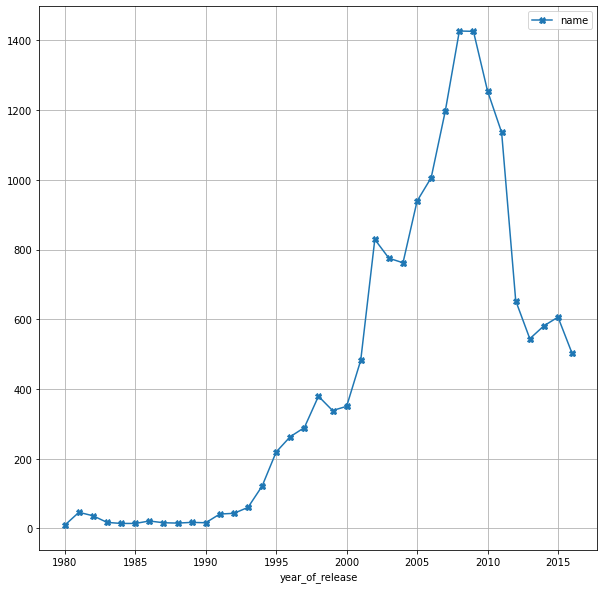

In [ ]:
df.groupby('year_of_release').agg({'name':'count'}).plot(grid=True, figsize=(10,10), marker='X');

Наблюдения по графику:

- Видим, что максимальное число игр выпускалось в 2008 и 2009 годах, затем произошел спад  практически в 2 раза
- Можно смело отбросить данные до 1993 года (выпуск игр не очень мал)

In [ ]:
df = df.query('year_of_release >= 1993')

<AxesSubplot:xlabel='year_of_release'>

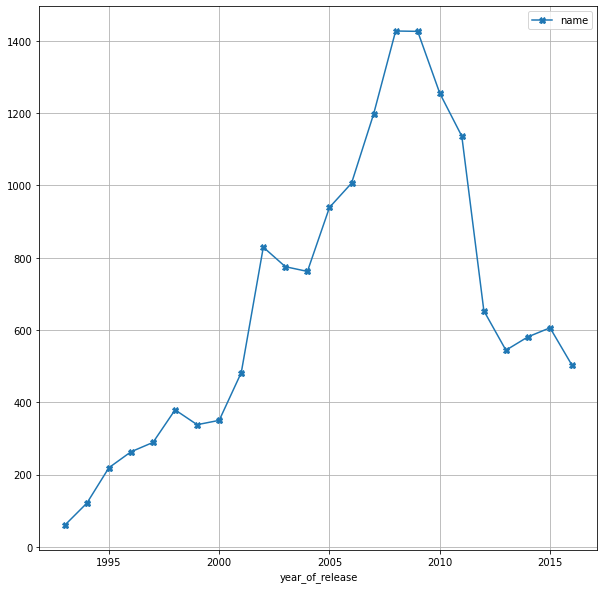

In [ ]:
df.groupby('year_of_release').agg({'name':'count'}).plot(grid=True, figsize=(10,10), marker='X')

### Зависимость продаж от платформ

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_all,user_score_all,rating_all,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,unknown,unknown,unknown,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,89.0,8.5,E,29.80


In [ ]:
#группируем данные о продажах по платформам
df_platforms = df.groupby('platform').agg({'total_sales':'sum'})

In [ ]:
#обновляем индексы (для построения диаграммы) и перезаписываем датасет
df_platforms.reset_index(inplace=True)

In [ ]:
#выполняем сортировку по возрастанию
df_platforms = df_platforms.sort_values(by='total_sales')

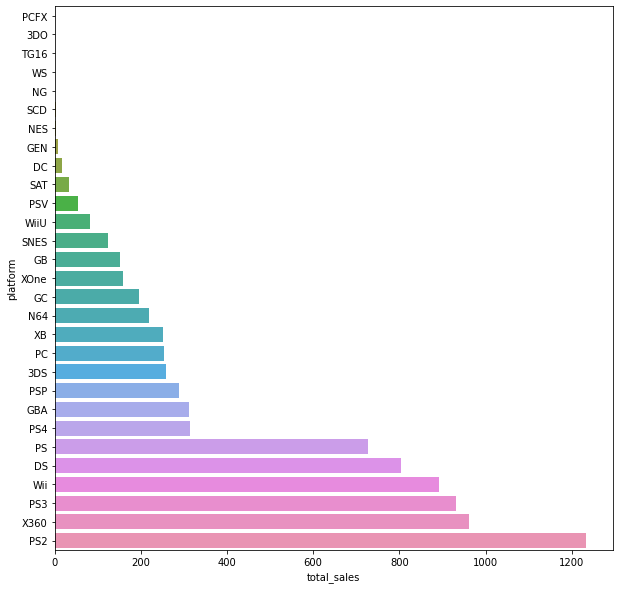

In [ ]:
plt.rcParams['figure.figsize']=10,10 #задаем размеры поля
sns.barplot(data=df_platforms, x='total_sales', y='platform');

По столбчатой диаграмме хорошо видно, что существует ТОП-6 платформ: PS2 (2000 год выпуска), X360 (2005 год), PS3 (2006 год), Wii (2006 год), DS (2004 год), PS (1994 года). PS4 вышла в конце 2013 года, поэтому еще не успела войти в топ списка.

Больше всего продаж по PS и X360, потому что этим платформам было порядка 10 лет на момент исследования.

Далее необходимо выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. И затем определить за какой характерный срок появляются новые и исчезают старые платформы.

Максимум проданных копий приходится на платформу PS2 - более 1200 млн проданных копий. Зададим нижнюю границу как 10% от максимума - т.е. 120 млн проданных копий и сделаем срез с этим условием, чтобы далее посмотреть распределение продах по годам. Если провести границу выше, то не попадет платформа X one (года выпуска 2013)):

In [ ]:
df_platforms.query('total_sales >= 120')

,platform,total_sales
21,SNES,124.69
4,GB,152.08
28,XOne,159.32
6,GC,196.73
8,N64,218.01
27,XB,251.57
11,PC,252.66
1,3DS,257.81
17,PSP,289.53
5,GBA,312.88


In [ ]:
#создаим список платформ с топ продажами
top_sales_platforms = list(df_platforms.query('total_sales >= 240')['platform'])

top_sales_platforms

['XB',
 'PC',
 '3DS',
 'PSP',
 'GBA',
 'PS4',
 'PS',
 'DS',
 'Wii',
 'PS3',
 'X360',
 'PS2']

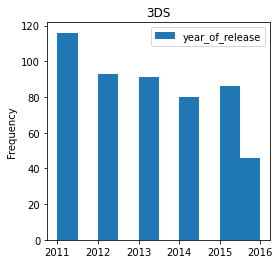

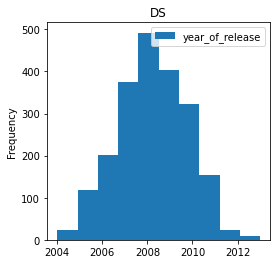

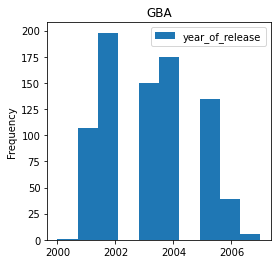

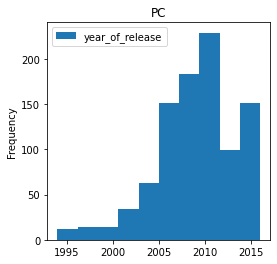

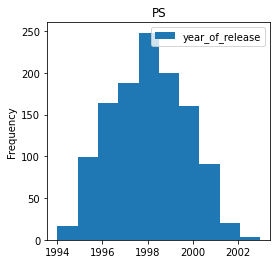

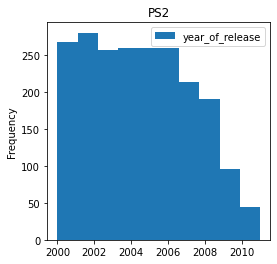

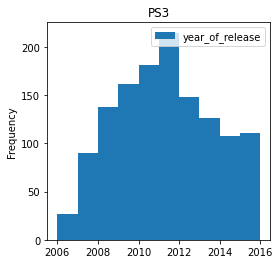

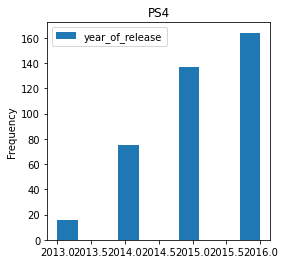

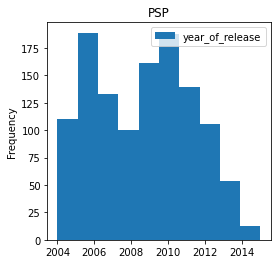

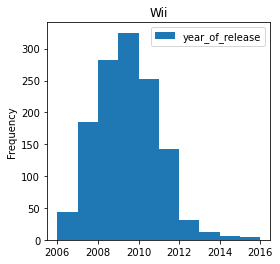

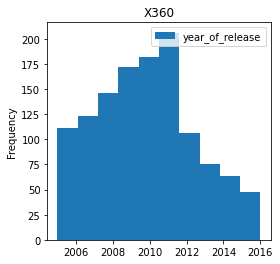

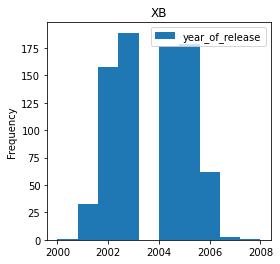

In [ ]:
plt.rcParams['figure.figsize']=4,4 #задаем размеры поля

#построим распределение количества выпущенных игр по годам
for name, group_data in df.query('platform in @top_sales_platforms').groupby('platform'):
    group_data.plot(y='year_of_release', kind='hist', title=name, bins=10)

По распределению выпущенных игр по годам видим, что есть старые платформы, по которым уже прекратился выпуск игр и есть новые (PS4, XOne, 3DS, PC)

<AxesSubplot:xlabel='year_of_release'>

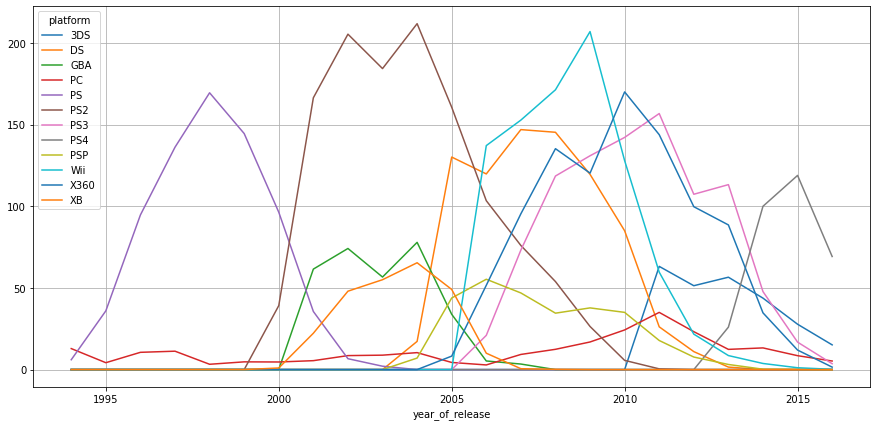

In [ ]:
#Посмотрим, как распределяются продажи по годам по разным платформам из top_sales_platforms
data_grouped_top_sales = df.query('platform in @top_sales_platforms')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

data_grouped_top_sales = data_grouped_top_sales.fillna(0) #заполнение пропусков
data_grouped_top_sales.plot(grid=True, figsize=(15,7))
#data_grouped_top_sales

Вывод:

- По распределению продаж видим, что существуют старые платформы (по которым продажи к текущему моменту уже прекратились) и новые платформы (по которым продажи еще есть)
- Характерный срок жизни платформы порядка 8 - 10 лет по старым платформам (PS, PS2, XB, PS3) и чуть меньше срок жизни новых платформ (PS4 - видим по графику, что экстремум продаж по этой платформе был достигнут за 3 года, значит можно предположить, что срок жизни составит порядка 6-7 лет). Это связано с тем, что сейчас обновление платформ происходит чаще. PS5 вышла как раз через 7 лет после PS4

### Работа с данными за актуальный период

#### Определение актуального периода

Актуальный период должен помочь нам определить план продаж на 2017 год. Исходя из срока жизни платформ в среденем 8 лет - возьмем период времени 4 года, т.е. с 2012 года по настоящий момент времени (здесь еще учли, что данные за 2016 год не полные)

#### Срез данных за актуальный период

In [ ]:
df_actual = df.query('year_of_release >= 2012')

In [ ]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_all,user_score_all,rating_all,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,unknown,unknown,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,unknown,unknown,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,83.0,5.3,M,13.79


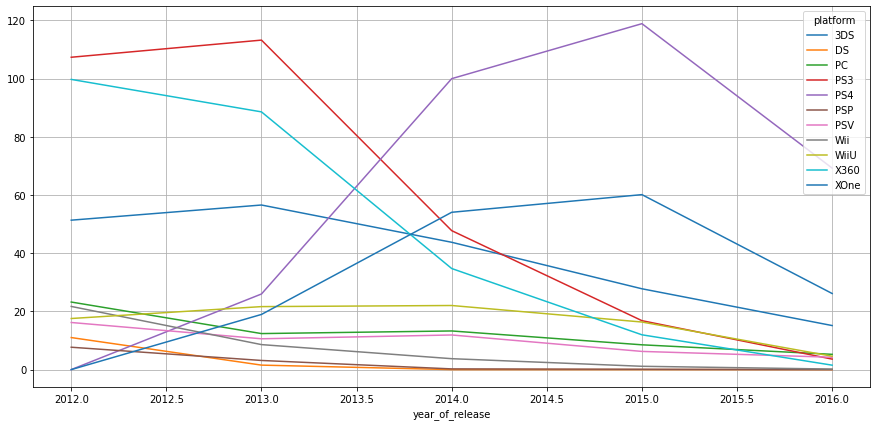

In [ ]:
#посмотрим как распределяются продажи по платформам за актуальный период
df_actual_group_sales = df_actual\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_actual_group_sales = df_actual_group_sales.fillna(0)
df_actual_group_sales.plot(figsize=(15,7), grid=True);

In [ ]:
df_1 = df_actual_group_sales.T.copy() #транспонируем датасет и делаем его копию

df_1

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,0.00,0.00,0.00
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,0.00,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,0.00
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


In [ ]:
#находим общую сумму продаж по платформам за актуальный период
df_actual_top_last = df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
df_actual_top_last

,total_sales
platform,
3DS,194.61
DS,12.55
PC,62.65
PS3,288.79
PS4,314.14
PSP,11.19
PSV,49.18
Wii,35.37
WiiU,82.19


In [ ]:
#объединяем таблицы
df_actual_top_sales = df_1.merge(df_actual_top_last, on='platform', how='inner')

df_actual_top_sales = df_actual_top_sales.sort_values('total_sales', ascending=False)

df_actual_top_sales

,2012,2013,2014,2015,2016,total_sales
platform,,,,,,
PS4,0.00,25.99,100.00,118.90,69.25,314.14
PS3,107.36,113.25,47.76,16.82,3.60,288.79
X360,99.74,88.58,34.74,11.96,1.52,236.54
3DS,51.36,56.57,43.76,27.78,15.14,194.61
XOne,0.00,18.96,54.07,60.14,26.15,159.32
WiiU,17.56,21.65,22.03,16.35,4.60,82.19
PC,23.22,12.38,13.28,8.52,5.25,62.65
PSV,16.19,10.59,11.90,6.25,4.25,49.18
Wii,21.71,8.59,3.75,1.14,0.18,35.37


**Выводы:**

- По этой сводной таблице df_actual_top_sales видим, что есть ТОП-5 платформ по продажам за актуальный период: PS4, PS3, X360, 3DS, XOne.
- Положительная динамика продаж (2016 не берем в расчет) есть только у двух платформ: PS4 and XOne. Это связано с тем, что платформы были выпущены в конце 2013 года (они самые современные)
- Отрицательная динамика продаж у PS3, X360, 3DS и у всех остальных (WiiU, PC, PSV, Wii, DS)

Как итог, выбираем следующие потенциальноп прибыльные платформы: PS4, XOne, 3DS (они топ 3 по продажм и самые новые из списка). Хотя 3DS в 2017 году будет 6 лет - подходит срок жизни платформы (7 лет для современных платформ)

#### Глобальные продажи игр в разбивке по платформам ("ящик с усами")

In [ ]:
#составим список топ платформ по продажам за актуальный период
#возьмем платформы с продажами от 20% от максимума
top_sales_platforms = list(df_actual_top_sales.query('total_sales > 50').index)
top_sales_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC']

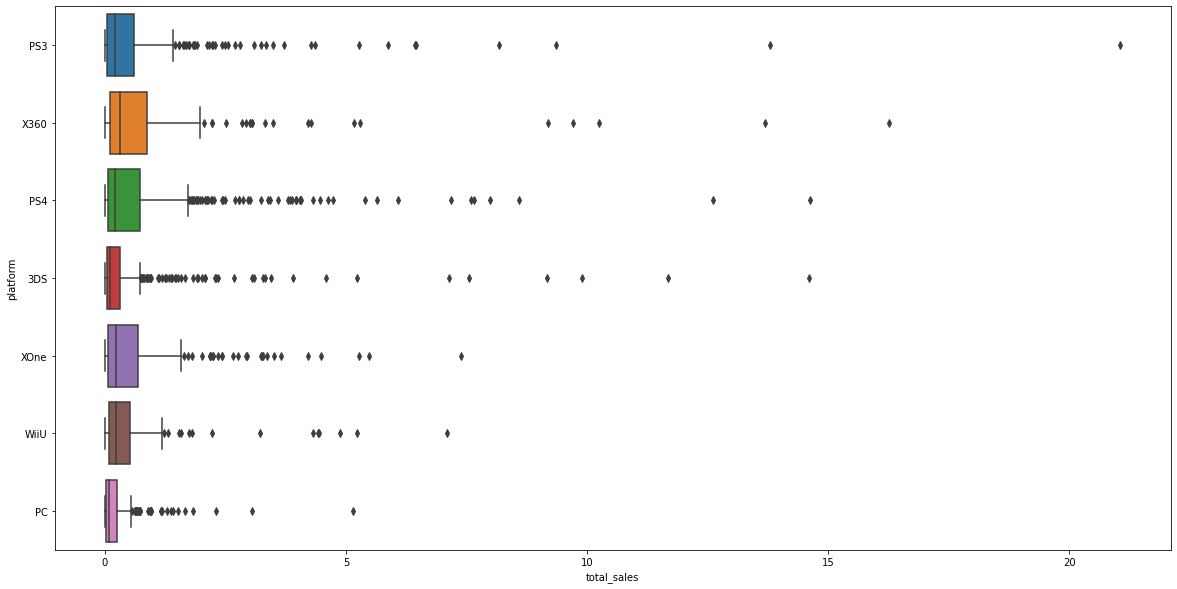

In [ ]:
#построим ящик с усами по платформам с топ продажами за актуальный период
plt.figure(figsize=(20,10))
sns.boxplot(
    data=df_actual.query('platform in @top_sales_platforms'),
    x = 'total_sales',
    y = 'platform'
);

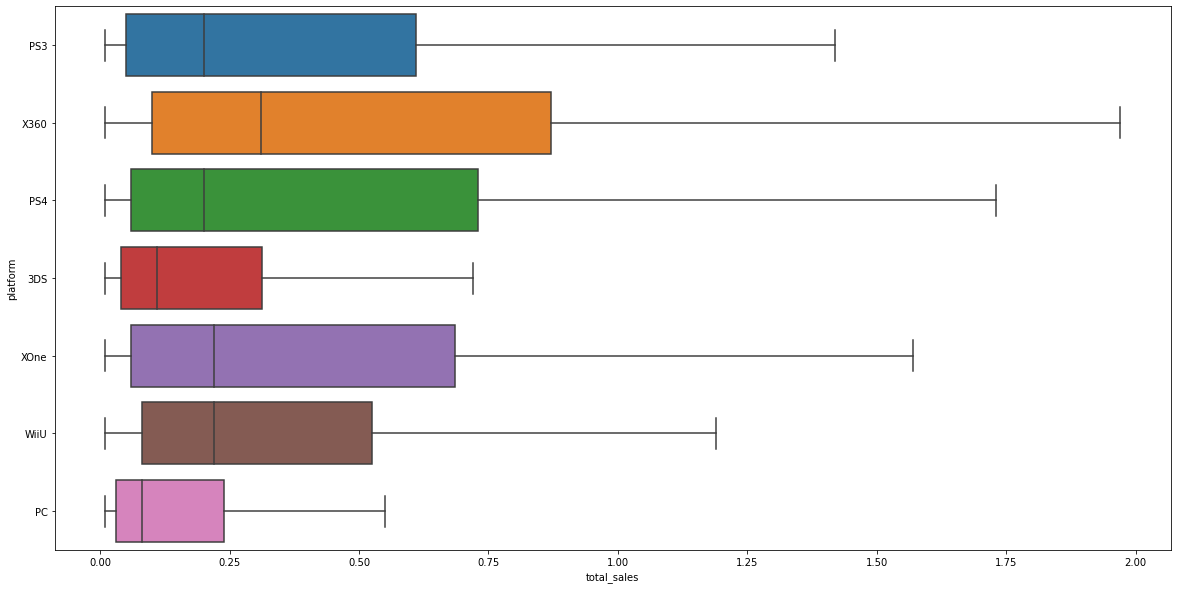

In [ ]:
#построим ящик с усами по платформам с топ продажами за актуальный период
plt.figure(figsize=(20,10))
sns.boxplot(
    data=df_actual.query('platform in @top_sales_platforms'),
    x = 'total_sales',
    y = 'platform',
    showfliers=False
);

Выводы:

- ТОП-5 платформ по продажам за актуальный период: PS4, PS3, X360, 3DS, XOne. Видим, что по X360 самый большой хвост вправо по продажам и самая большая медиана; по PS3, PS4 XOne медиана и межквартильные расстояния похожи
- По платформам PS4, PS3 (GTA V, Call of Duty: Black Ops II), X360 (GTA V, Call of Duty: Black Ops II), 3DS (Pokemon X/Pokemon Y) есть игры-хиты с огромными продажами (сильные выбросы)

In [ ]:
#посмотрим игры-хиты
df_actual[df_actual['total_sales'] > 13]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_all,user_score_all,rating_all,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,unknown,unknown,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,unknown,unknown,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,83.0,4.8,M,13.68


#### Влияние на продажи игр внутри одной популярной платформы отзывов критиков и игроков

За актуальный период самые большие продажи и платформы PS4, поэтому берем данные по ней

Построим диаграмму рассеяния и посчитаим корреляцию между отзывами и продажами. При этом возьмем срез по общим продажам до 1.25 млн, так как опираясь на боксплот далее идут выбросы

In [ ]:
df_PS4_corr = df_actual.query('platform == "PS4" & total_sales < 1.25')

In [ ]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2886 non-null   object 
 1   platform          2886 non-null   object 
 2   year_of_release   2886 non-null   int64  
 3   genre             2886 non-null   object 
 4   na_sales          2886 non-null   float64
 5   eu_sales          2886 non-null   float64
 6   jp_sales          2886 non-null   float64
 7   other_sales       2886 non-null   float64
 8   critic_score      1312 non-null   float64
 9   user_score        1531 non-null   float64
 10  rating            1611 non-null   object 
 11  critic_score_all  2886 non-null   object 
 12  user_score_all    2886 non-null   object 
 13  rating_all        2886 non-null   object 
 14  total_sales       2886 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 360.8+ KB


<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Ранее мы на месте пропусков в оценке игроков, критиков и  рейтинге указали unknown. Из-за этого поменялся тип слобца на object и мы не можем делать математичнские вычисления с данным столбцом. Как лучше сделать? Создать доп столбце с оценками с числовыми значениями и матем операции проводить с ним, а когда смотрим распределения использовать исходный столбец где есть unknown?
 </div>

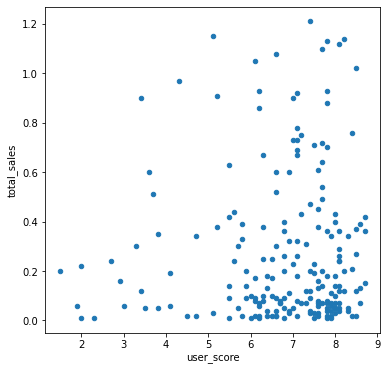

In [ ]:
df_PS4_corr.plot(y='total_sales', x='user_score', kind='scatter', figsize=(6,6));

Посмотрим кф корреляции между общими продажами и отзывами игроков для PS4

In [ ]:
df_PS4_corr['total_sales'].corr(df_PS4_corr['user_score'])

0.034298258756055494

Видим, что корреляция с отзывами пользователей отсутсвует

Посмотрим теперь корреляцию с оценками критиков

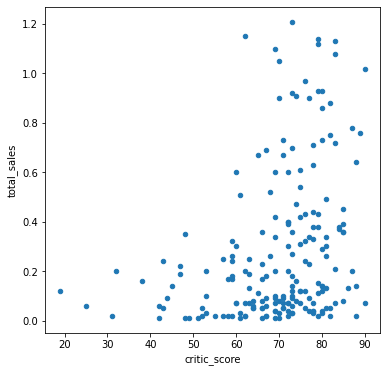

In [ ]:
df_PS4_corr.plot(y='total_sales', x='critic_score', kind='scatter', figsize=(6,6));

In [ ]:
df_PS4_corr['total_sales'].corr(df_PS4_corr['critic_score'])

0.31176209348202416

Вывод:

Существует небольшая положительная корреляция между общими продажами и оценкой критиков. С оценками польщователей же такой корреляции нет

#### Влияние на продажи игр отзывов критиков и игроков по другим платформам

В прошлом задании мы выбрали самую популярную платформу - PS4. Посмотрим, подтвердятся ли выводы по этой платформе на остальных платформах из списка ТОП по продажам top_sales_platforms (что продажи зависят от оценки критиков и не зависят от оценки пользователей)

In [ ]:
#вспомним платформы в списке top_sales_platforms
top_sales_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC']

In [ ]:
df_critic_score_corr_sales = df_actual.query('platform in @top_sales_platforms')\
.pivot_table(index='platform', values=['total_sales', 'critic_score', 'user_score'], aggfunc='corr')

#удаляем лишние столбцы (они дублируют инфу)
df_critic_score_corr_sales = df_critic_score_corr_sales.drop(columns=['critic_score', 'user_score'])

df_critic_score_corr_sales

total_sales
platform                          
3DS      total_sales      1.000000
         critic_score     0.320803
         user_score       0.197583
PC       total_sales      1.000000
         critic_score     0.237243
         user_score      -0.121867
PS3      total_sales      1.000000
         critic_score     0.331497
         user_score      -0.005144
PS4      total_sales      1.000000
         critic_score     0.406568
         user_score      -0.031957
WiiU     total_sales      1.000000
         critic_score     0.348380
         user_score       0.400219
X360     total_sales      1.000000
         critic_score     0.360573
         user_score       0.006164
XOne     total_sales      1.000000
         critic_score     0.416998
         user_score      -0.068925

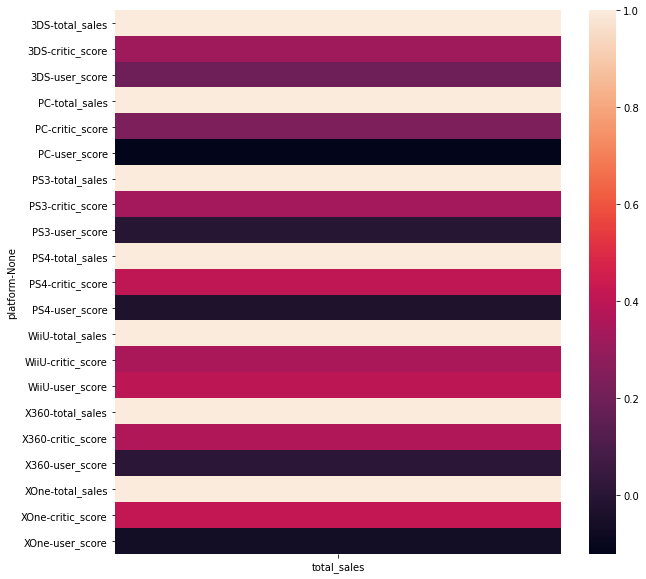

In [ ]:
#построим heatmap для наглядности
plt.figure(figsize=(10,10))
sns.heatmap(data = df_critic_score_corr_sales);

Вывод

Видим, что по другим платформам из списка топ по продажам существует положительная корреляция между отзывами критиков и общими продажами и отстутствует корреляция между продажами и оценками пользователей. Таким образом, выводы, сформулированные для самой популярной платформы релевантны и для остальных платформ

#### Распределение жанров игр по продажам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_all,user_score_all,rating_all,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,unknown,unknown,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,unknown,unknown,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,83.0,5.3,M,13.79


In [ ]:
df_genre_sales = df_actual.\
pivot_table(index='genre', values='total_sales', aggfunc=['median', 'mean'])
df_genre_sales.columns = ['median_total_sales', 'mean_total_sales']

df_genre_sales = df_genre_sales.sort_values(by='mean_total_sales', ascending=False)

df_genre_sales

,median_total_sales,mean_total_sales
genre,,
Shooter,0.440,1.296723
Platform,0.210,0.717647
Sports,0.240,0.675634
Role-Playing,0.140,0.521081
Racing,0.140,0.465217
Misc,0.120,0.442917
Simulation,0.120,0.439000
Action,0.120,0.427856
Fighting,0.130,0.408165


In [ ]:
df_genre_sales_2 = df_actual.\
pivot_table(index='genre', values='total_sales', aggfunc=['median', 'mean', 'sum'])
df_genre_sales_2.columns = ['median_total_sales', 'mean_total_sales', 'sum_total_sales']

df_genre_sales_2 = df_genre_sales_2.sort_values(by='mean_total_sales', ascending=False)

df_genre_sales_2

,median_total_sales,mean_total_sales,sum_total_sales
genre,,,
Shooter,0.440,1.296723,304.73
Platform,0.210,0.717647,61.00
Sports,0.240,0.675634,181.07
Role-Playing,0.140,0.521081,192.80
Racing,0.140,0.465217,53.50
Misc,0.120,0.442917,85.04
Simulation,0.120,0.439000,35.12
Action,0.120,0.427856,441.12
Fighting,0.130,0.408165,44.49


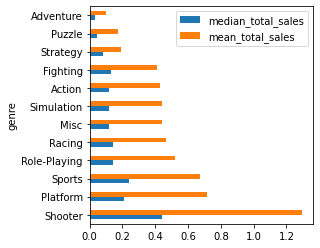

In [ ]:
df_genre_sales.plot(kind='barh');

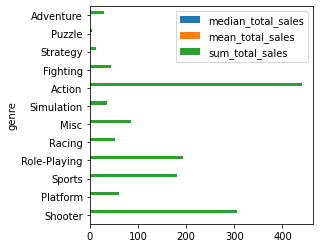

In [ ]:
df_genre_sales_2.plot(kind='barh');

In [ ]:
df_genre_sales.head()

,median_total_sales,mean_total_sales
genre,,
Shooter,0.44,1.296723
Platform,0.21,0.717647
Sports,0.24,0.675634
Role-Playing,0.14,0.521081
Racing,0.14,0.465217


Выводы:

- Видим, что самые стабильные по прибыли жанры (с наибольшим средним по продажам: Shooter, Platform, Sports, Role-Playing, Racing.

- ТОП-5 жанры по общим продажам: Action, Shooter, Role-Playing, Sports, Misc. Получается интересная ситуация, что жанр Action лидирует по общим продажам, однако по средним или медианным продажам не попал даже в ТОП-5. Значит в жанре Action есть несколько звезд (таких как GTA V), а остальные игры не такие успешные. Поэтому если мы хотим сосредоточить рекламную компанию на потенциально прибыльные в будущем игры, то лучше брать жанр 'shooter' (медиана и среднее в 2 раза опережает ближайшего преследователя)

## Портрет пользователя каждого региона

### Топ-5 платформ по регионам

#### Топ-5 платформ NA

In [ ]:
df_na = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)

#определяем процентное соотношение продаж по платформе к общим продажам в регионе
df_na['procent_of_total_sales'] = df_na['na_sales'].apply(lambda x: x / sum(df_na['na_sales']))

df_na.head()

,na_sales,procent_of_total_sales
platform,,
X360,140.05,0.236983
PS4,108.74,0.184003
PS3,103.38,0.174933
XOne,93.12,0.157571
3DS,55.31,0.093592


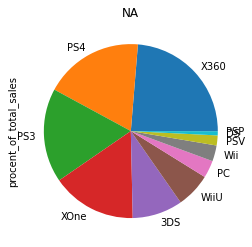

In [ ]:
df_na['procent_of_total_sales'].plot(kind='pie', title='NA');

Выводы по продажам в NA регионе:

- ТОП-5 платформ: X360 (23.7%), PS4(18.4%), PS3(17.5%), XOne(15.7%), 3DS (9.3%)
- на ТОП-5 платформ приходится порядка 85% продаж в регионе

#### Топ-5 платформ EU

In [ ]:
df_eu = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)

#определяем процентное соотношение продаж по платформе к общим продажам в регионе
df_eu['procent_of_total_sales'] = df_eu['eu_sales'].apply(lambda x: x / sum(df_eu['eu_sales']))

df_eu.head()

,eu_sales,procent_of_total_sales
platform,,
PS4,141.09,0.278383
PS3,106.86,0.210844
X360,74.52,0.147034
XOne,51.59,0.101792
3DS,42.64,0.084132


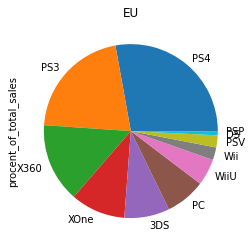

In [ ]:
df_eu['procent_of_total_sales'].plot(kind='pie', title='EU');

Выводы по продажам в EU регионе:

- ТОП-5 платформ: PS4 (27.8%), PS3(21.1%), X360(14.7%), XOne(10.2%), 3DS (8.4%)
- на ТОП-5 платформ приходится порядка 82% продаж в регионе

#### Топ-5 платформ JP

In [ ]:
df_jp = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)

#определяем процентное соотношение продаж по платформе к общим продажам в регионе
df_jp['procent_of_total_sales'] = df_jp['jp_sales'].apply(lambda x: x / sum(df_jp['jp_sales']))

df_jp.head()

,jp_sales,procent_of_total_sales
platform,,
3DS,87.79,0.455862
PS3,35.29,0.183249
PSV,21.04,0.109253
PS4,15.96,0.082875
WiiU,13.01,0.067556


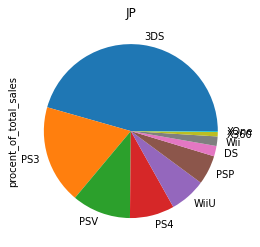

In [ ]:
df_jp['procent_of_total_sales'].plot(kind='pie', title='JP');

Выводы по продажам в JP регионе:

- ТОП-5 платформ: 3DS (45.6%), PS3(18.3%), PSV(10.9%), PS4(8.2%), WiiU (6.8%)
- на ТОП-5 платформ приходится порядка 90% продаж в регионе, причем практически половину продаж составляет платформа 3DS (45.6%). Такого сильно перекоса продаж в сторону одной платформы не было ни в NA, ни в EU
- Видим, что регион JP сильно отличается от NA and EU по составу ТОП-5 платформ и по распределению продаж

**Общий вывод по ТОП-5 в регионах:**

- Регионы EU and NA имеют одинаковый состав ТОП-5 платформ по продажам. Отличие лишь в том, что в EU ТОП-1 - это новая платформа PS4 (27% продаж), а в NA ТОП-1 старенькая X360 (23.7%)
- Регион JP сильно отличается от NA and EU по составу ТОП-5 платформ и по распределению продаж. В JP практически половину продаж составляет платформа 3DS (45.6%). Такого сильно перекоса продаж в сторону одной платформы не было ни в NA, ни в EU. Также платформы xOne and X360 вообще не попали в ТОП-5, зато есть старенькая консоль PSV

### Топ-5 жанры по регионам

#### Топ-5 жанров NA

In [ ]:
df_na = df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)

#определяем процентное соотношение продаж по жанрам к общим продажам в регионе
df_na['procent_of_total_sales'] = df_na['na_sales'].apply(lambda x: x / sum(df_na['na_sales']))

df_na.head()

,na_sales,procent_of_total_sales
genre,,
Action,177.84,0.300929
Shooter,144.77,0.244970
Sports,81.53,0.137960
Role-Playing,64.00,0.108297
Misc,38.19,0.064623


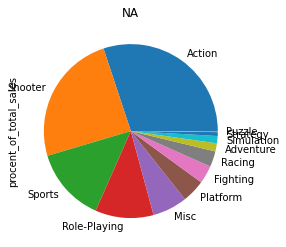

In [ ]:
df_na['procent_of_total_sales'].plot(kind='pie', title='NA');

Выводы по продажам в NA регионе:

- ТОП-5 жанров: Action (30%), Shooter (24.5%), Sports (13.8%), Role-Playing(10.8%), Misc (6.4%)
- на ТОП-5 жанров приходится порядка 85% продаж в регионе

#### Топ-5 жанров EU

In [ ]:
df_eu = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)

#определяем процентное соотношение продаж по платформе к общим продажам в регионе
df_eu['procent_of_total_sales'] = df_eu['eu_sales'].apply(lambda x: x / sum(df_eu['eu_sales']))

df_eu.head()

,eu_sales,procent_of_total_sales
genre,,
Action,159.34,0.314392
Shooter,113.47,0.223886
Sports,69.09,0.136321
Role-Playing,48.53,0.095754
Racing,27.29,0.053846


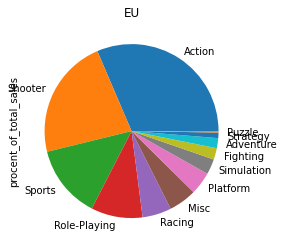

In [ ]:
df_eu['procent_of_total_sales'].plot(kind='pie', title='EU');

Выводы по продажам в EU регионе:

- ТОП-5 жанров: Action (31.5%), Shooter (22.4%), Sports (13.6%), Role-Playing(9.6%), Racing (5.4%)
- на ТОП-5 жанров приходится порядка 85% продаж в регионе
- EU and NA идентичны по предпочтению жанров. Различие лишь в 5-ом месте - Misc (NA) and Racing (EU)

#### Топ-5 жанров JP

In [ ]:
df_jp = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)

#определяем процентное соотношение продаж по платформе к общим продажам в регионе
df_jp['procent_of_total_sales'] = df_jp['jp_sales'].apply(lambda x: x / sum(df_jp['jp_sales']))

df_jp.head()

,jp_sales,procent_of_total_sales
genre,,
Role-Playing,65.44,0.339807
Action,52.80,0.274172
Misc,12.86,0.066777
Simulation,10.41,0.054055
Fighting,9.44,0.049019


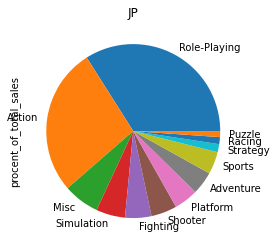

In [ ]:
df_jp['procent_of_total_sales'].plot(kind='pie', title='JP');

Выводы по продажам в JP регионе:

- ТОП-5 жанров: Role-Playing (34%), Action (27.4%), Misc (6.7%), Simulation(5.4%), Fighting(5%)
- на ТОП-5 жанров приходится порядка 75% продаж в регионе, причем на с большим отрывом лидируют ТОП-2 жанра Role-Playing (34%), Action (27.4%)

**Общие выводы по жанрам и портретам пользователей из разных регионов:**

- EU and NA идентичны по предпочтению жанров. Различие лишь в 5-ом месте - Misc (NA) and Racing (EU)
- Как и в случае с платформами, регион JP сильно отличается от NA and EU. Пользователи из JP отдают предпочтение жанру Role-Playing (34%) в то время как этот жанр находится на 4-ом месте в решионах EU (10%) and NA (9.6%)
- Жанр Action находится в ТОП-2 по продажам в любом регионе и занимает практически одинаковыю долю в продажах (от 27% до 30%). Выходит - Action самый популярный жанр

### Влияние рейтинга ESRB на продажи в отдельном регионе

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

In [ ]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_all,user_score_all,rating_all,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,unknown,unknown,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,unknown,unknown,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,83.0,5.3,M,13.79


#### Оценим влияние ESRB на продажи в NA

In [ ]:
df_na = df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)

#определяем процентное соотношение продаж по жанрам к общим продажам в регионе
df_na['procent_of_total_sales'] = df_na['na_sales'].apply(lambda x: x / sum(df_na['na_sales']))

df_na.head()

,na_sales,procent_of_total_sales
rating,,
M,231.57,0.474860
E,114.37,0.234528
E10+,75.70,0.155231
T,66.02,0.135381


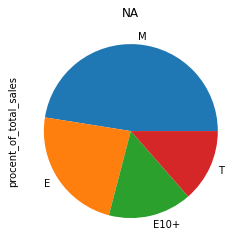

In [ ]:
df_na['procent_of_total_sales'].plot(kind='pie', title='NA');

Выводы по региону NA:

- Рейтинг М (47.5%) - для взрослых, Е (23.5%) - для всех, E10+ (15.5%) - старше 10 лет, Т (13.5%) - от 13 лет (подросткам)

#### Оценим влияние ESRB на продажи в EU

In [ ]:
df_eu = df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)

#определяем процентное соотношение продаж по рейтингу к общим продажам в регионе
df_eu['procent_of_total_sales'] = df_eu['eu_sales'].apply(lambda x: x / sum(df_eu['eu_sales']))

df_eu.head()

,eu_sales,procent_of_total_sales
rating,,
M,193.96,0.467013
E,113.03,0.272152
E10+,55.37,0.133319
T,52.96,0.127516


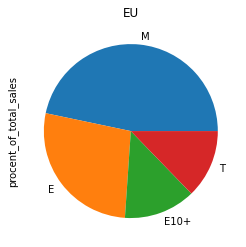

In [ ]:
df_eu['procent_of_total_sales'].plot(kind='pie', title='EU');

Выводы по региону EU:

- Рейтинг М (46.7%) - для взрослых, Е (27.2%) - для всех, E10+ (13.3%) - старше 10 лет, Т (12.7%) - от 13 лет (подросткам)
- Структура продаж по рейтингу для EU полностью идентична региону NA

#### Оценим влияние ESRB на продажи в JP

In [ ]:
df_jp = df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)

#определяем процентное соотношение продаж по платформе к общим продажам в регионе
df_jp['procent_of_total_sales'] = df_jp['jp_sales'].apply(lambda x: x / sum(df_jp['jp_sales']))

df_jp.head()

,jp_sales,procent_of_total_sales
rating,,
E,28.33,0.338309
T,26.02,0.310724
M,21.20,0.253165
E10+,8.19,0.097803


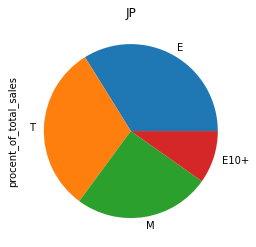

In [ ]:
df_jp['procent_of_total_sales'].plot(kind='pie', title='JP', normalize=False);

In [ ]:
#используем столбец с рейтингом, в котором пропуски заменены значением 'unknown'
df_jp = df_actual.pivot_table(index='rating_all', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)

#определяем процентное соотношение продаж по платформе к общим продажам в регионе
df_jp['procent_of_total_sales'] = df_jp['jp_sales'].apply(lambda x: x / sum(df_jp['jp_sales']))

df_jp.head()

,jp_sales,procent_of_total_sales
rating_all,,
unknown,108.84,0.565168
E,28.33,0.147108
T,26.02,0.135113
M,21.20,0.110084
E10+,8.19,0.042528


Для региона JP по многим играм не указан рейтинг (ESRB). Возможно, это связано с тем, что этот рейтинг для США и Канады.

In [ ]:
df_actual[(df_actual['rating_all'] == 'unknown') & (df_actual['total_sales'] > 10)].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_all,user_score_all,rating_all,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,unknown,unknown,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,unknown,unknown,unknown,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,unknown,unknown,unknown,11.68


Проверка через официальный сайт ESRB показала, что, например, игра Call of Duty: Black Ops 3 имеет рейтинг M, а в нашем датасете пропуск. Поэтому можно предполодить, что в нашем датасете были ошибки при формировании выгрузки. Либо наша выгрузка была получена путем склеивания двух выгрузок (с продажами и рейтингом и во второй было много пропусков). Тоже самое касается игры Pokemon X/Pokemon Y - ESRB rating E

Выводы по региону JP:

- Рейтинг E (33.8%) - для всех, Т (31%) от 13 лет (подросткам), M (25.3%) - старше 17 лет (для взрослых), Е10+ (9.7%) - от 10 лет (подросткам)
- Структура продаж по рейтингу для JP оличается от NA and EU. Для JP в топ вышли игры для тинейджеров (от 13 лет)

**Общие выводы по структуре продаж в зависимости от рейтинга:**

- Структура продаж по рейтингу для EU полностью идентична региону NA (Рейтинг М (46.7%) - для взрослых, Е (27.2%) - для всех, E10+ (13.3%) - старше 10 лет, Т (12.7%) - от 13 лет (подросткам))
- Структура продаж по рейтингу для JP (Рейтинг E (33.8%) - для всех, Т (31%) от 13 лет (подросткам), M (25.3%) - старше 17 лет (для взрослых), Е10+ (9.7%) - от 10 лет (подросткам)) оличается от NA and EU. Для JP в топ вышли игры для тинейджеров (от 13 лет)
- Самые продаваемые игры с рейтингом М (от 25 до 47%) и Е (от 27% до 33%)
- Также отмечаем, что есть игры с рейтингом unknown. Такие игры в NA and EU регионе занимеют порядка 18% продаж, а в регионе JP 57%. Поэтому для регина JP сформировать объективные выводы относительно распределения продаж относительно рейтинга ESRB затруднительно

## Проверка гипотезы

### Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

- Н0: средние пользовательские рейтинги  двух игровых платформ Xbox One и PC одинаковые;
- Н1: средние пользовательские рейтинги двух игровых платформ Xbox One и PC разные

In [ ]:
df_PC = df_actual.query('platform == "PC"')

#df_PC = list(df_PC['user_score'].dropna())

df_PC['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [ ]:
df_XOne = df_actual.query('platform == "XOne"')

df_XOne['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Уже сейчас "невооруженным" взглядом видно, что средние значения генеральных совокупностей практически одинаковы, дисперсии похожи и количесвто значений в совокупностях одинако. Скорее всего, мы не сможем отвергнуть Н0

Генеральные совокупности достаточны для проверки гипотезы (182 и 206 значений), дисперсии имеют одинаковый порядок. Можем использовать т тест и указать параметр equal_var=True

In [ ]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

In [ ]:
results = st.ttest_ind(
    df_PC['user_score'].dropna(), 
    df_XOne['user_score'].dropna())

In [ ]:
print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу в пользу альтернативной")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу в пользу альтернативной


Вывод:

По итогу проверки гипотезы о равенстве средних оценок пользователей для РС и для XOne - отвергнуть эту гипотезу не получилось

### Гипотеза 2 - Средние пользовательские рейтинги жанров Action  и Sports разные.

Сформулируем нулевую и альтернативную гипотезы:

- Н0: средние пользовательские рейтинги двух жанров Action and Sports одинаковые;
- Н1: средние пользовательские рейтинги двух жанров Action and Sports одинаковые

Соответственно, если мы отвергнем гипотезу Н0, то сделаем вывод в пользу альтернативной и подтвердим требуемую в задании гипотезу

In [ ]:
df_action = df_actual.query('genre == "Action"')

df_action['user_score'].describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [ ]:
df_sports = df_actual.query('genre == "Sports"')

df_sports['user_score'].describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Генеральные совокупности достаточны для проверки гипотезы (523 и 195 значений), дисперсии имеют одинаковый порядок. Можем использовать т тест и указать параметр equal_var=True

In [ ]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

In [ ]:
results = st.ttest_ind(
    df_action['user_score'].dropna(), 
    df_sports['user_score'].dropna())

In [ ]:
print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу в пользу альтернативной")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Вывод:

Н0 - это была гипотеза о равенстве средних. Мы её отвергли в пользу альтернативной. Значит средние пользовательские рейтинги жанров Action  и Sports действительно разные

## Общий вывод

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Вывод должен помочь нам определить стратегию на 2017 год:

- успешность выпускаемой игры во многом зависит от жанра к которому она пренадлежит. Если выпустить игру популярного жанра она с большей вероятностью станет успешной, чем игра не популярного жанра. В процессе работы были найдены топ 5 жанров (Action, Shooter, Role-Playing, Sports, Misc). Также самым популярным жанром для всех регионов стал жанр Action (он находится в ТОП-2 по продажам в любом регионе и занимает практически одинаковыю долю в продажах (от 27% до 30%));

- продажи игры зависят от рейтинга ESRB. Самые продаваемые игры с рейтингом М (от 25 до 47%) и Е (от 27% до 33%) для всех регионов;

- игровые платформы появляются и исчезают, лучше выпускать игру на самой популярной игровой платформе в данный момент, либо набирающей популярность. Есть ТОП-5 платформ по продажам за актуальный период (последние 4 года): PS4, PS3, X360, 3DS, XOne. Положительная динамика продаж (2016 не берем в расчет) есть только у двух платформ: PS4 and XOne. Это связано с тем, что платформы были выпущены в конце 2013 года (они самые современные). Отрицательная динамика продаж у PS3, X360, 3DS. Таким образом, лучше сосредоточиться на играх для платформ PS4, XOne и 3DS;

- в успешности игры важно мнение критиков, если у рейтинг критиков низкий, стоит прислушаться и доработать игру. С оценками польщователей же такой корреляции нет;

- **По итогам анализа, в 2017 году рекомендуется выпустить игру на современных платформах с положительной динамикой продаж PS4 или Xbox One жанров Action или Shooter и рейтингом ESRB - М которая будет распространяться на рынках Северной Америки и Европы, так как именно в этом сегменте самые большие продажи (предпочтение стоит отдать жанранру Shooter  у которого самые высокие средние показатели продаж (1.3 млн копий) против Action (0.43 млн копий). Для рынка Японии можно было бы выпустить игру жанра Role-Playing, но текущий размер продаж (65 млн копий) почти в 6 раз меньше, чем продажи в жанре Action для Северной Америки и Европы.**

<blockquote>

**Общий вывод по проекту**

Спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец! Есть несколько важных моментов, которые я отметил и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях.
 
**Отмечу отдельные положительные моменты проекта**:
* На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
* Очень подробные исследования на каждом шагу
* На каждом шагу есть подробные выводы и наблюдения
* Хорошая разнообразная визуализация

**Что нужно исправить**
* Заполнить пропуски в рейтинге
* Исправить анализ прибыльных жанров
* Остальные рекомендации ты найдешь в комментариях выше

   
Если есть вопросы, я готов на них ответить.
    
Для будущего развития в плане визуализации советую обратить внимание на этот гайд по seaborn, библиотеке для визуализаци - примеры кода и графиков на русском
https://nbviewer.org/urls/mipt-stats.gitlab.io/courses/python/09_seaborn.ipynb
    
**Желаю удачи и жду твой проект на повторное ревью!**
</blockquote>